    Individual Plan


github link:https://github.com/ting20231227-ctrl/dsci100-individual

    (1).Importing data


In [2]:
library(tidyverse)
url='https://drive.google.com/uc?export=download&id=1DPK-faIDmjTfkVzy1O-nmrd3lmK97dmX'
players<-read_csv(url)
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


    1.Data description

I downloaded the players information, which shows there are 196 players in total and 7 variables.

-Experience, categorical variable, the level of experience of players in the game.

-Subscribe, logical variable, whether players subscribe to the game news letter or not.

-hashedEmail, string, an anonymized email that targeted different players.

-played_hours, numeric variable, the time in hours that players played in this game.

-name, string, player's name.

-gender, categorical variable, player's gender.

-Age, numeric variable, player's age in years.

In [3]:
library(tidyverse)
url='https://drive.google.com/uc?export=download&id=1T3Vgo6ee6eJ40PTWLs8PKS_FU_0borDG'
sessions<-read_csv(url)
head(sessions)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


This data contains the information of player's game play session, it contains 1535 sessions and 5 variables. Each of the row corresponds to a player.

-Hashed email, string variable, an anonymized identifier linking each sessions to players in the 'players_csv'.

-start_time, string variable, timestamp indicating when the session time started.

-end_time, string variable, timestamp indicating when the session time ended.

-original_start_time, numeric variable, the Unix timestamp, which is equivalent to the session start time.

-original_end_time, numeric variable, the Unix timestamp, which is equivalent to the session end time.

    2. Research questions

Broad question: State question 3, we are interested in demand forecasting, what time is windows are most likely to have large number of simultaneous players.

The specific question: Do peak server usage times show at the temporal clustering around specific hours of the day?

    3.Exploratory Analysis & Visualizations

In [4]:
library(tidyverse)
library(lubridate)
sessions_clean <- sessions |>
  mutate( 
    start_time = dmy_hm(start_time),
    hour = hour(start_time)            
  )
sessions_clean

hashedEmail,start_time,end_time,original_start_time,original_end_time,hour
<chr>,<dttm>,<chr>,<dbl>,<dbl>,<int>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-30 18:12:00,30/06/2024 18:24,1.71977e+12,1.71977e+12,18
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-06-17 23:33:00,17/06/2024 23:46,1.71867e+12,1.71867e+12,23
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,2024-07-25 17:34:00,25/07/2024 17:57,1.72193e+12,1.72193e+12,17
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-07-25 03:22:00,25/07/2024 03:58,1.72188e+12,1.72188e+12,3
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-05-25 16:01:00,25/05/2024 16:12,1.71665e+12,1.71665e+12,16
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-23 15:08:00,23/06/2024 17:10,1.71916e+12,1.71916e+12,15
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,2024-04-15 07:12:00,15/04/2024 07:21,1.71317e+12,1.71317e+12,7
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,2024-09-21 02:13:00,21/09/2024 02:30,1.72688e+12,1.72689e+12,2
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,2024-06-21 02:31:00,21/06/2024 02:49,1.71894e+12,1.71894e+12,2


In [5]:
hourly_usage <- sessions_clean |>
  group_by(hour) |>
  summarize(session_count = n())
hourly_usage

hour,session_count
<int>,<int>
0,128
1,79
2,152
3,131
4,151
5,88
6,74
7,56
8,12


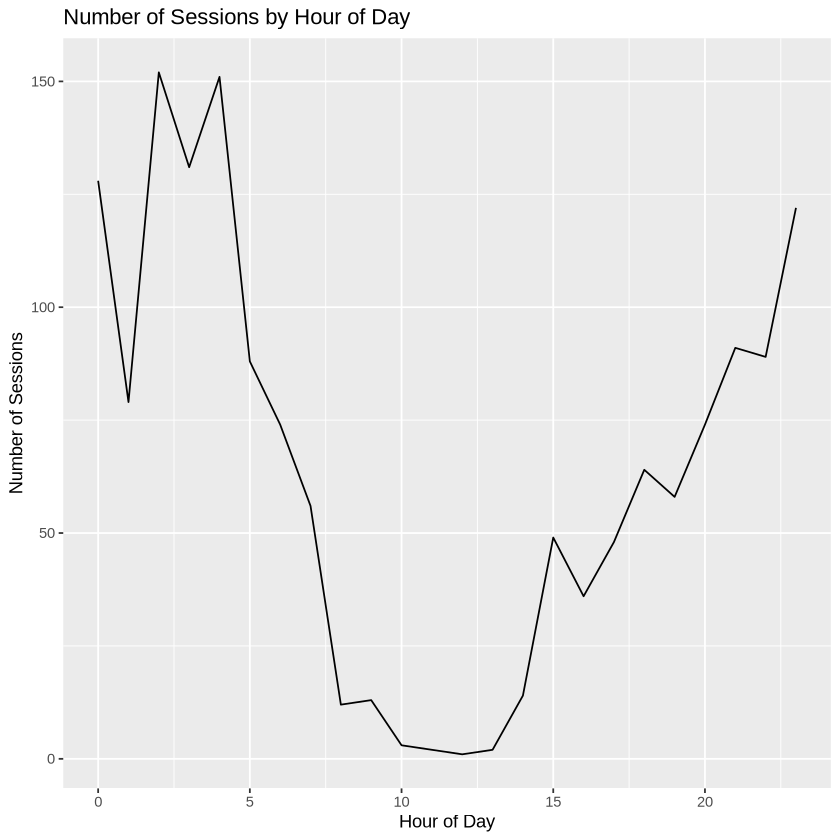

In [6]:
library(tidyverse)
hourly_usage_plot<-ggplot(hourly_usage,aes(x=hour,y=session_count))+
geom_line()+
labs(title = "Number of Sessions by Hour of Day",
       x = "Hour of Day",
       y = "Number of Sessions")
hourly_usage_plot

This diagram illustrates the relationship between the hours of the day and the number of sessions, with a clear peak in the early morning at 2:00-4:00, and in the evening at 20:00-23:00. The early morning peak reflects the players in different time zone or play the game overnight, and the evening peak may shows that more players play game after school or work. So the hours of the day do have specific peaks clustering time, which is related to the specific question, and strengthens that that equally allocating uniform resources across 24 hours is inefficient.

    4. Further analysis and plan

First, it's important to note the overall analytical goal. The independent variable is "the hours of the day", and the dependent variable is numeric("the number of sessions"), meaning our project is regression rather than classification.
So both of the regression models (linear regression and KNN regression) fit to predict continuous values.
The main goal of using two regression models is to determine how the number of sessions would change at different times of day, to obtain a model that minimizes prediction error and captures the best-fitting relationship.

1. Build a linear regression model:  I would use the linear regression model to predict the linear relationship between hours of the day and the number of sessions. But based on the diagram shown above, I did not expect that the two values would be strictly linear. A linear model may fail to catch the peaks.
2. Build K-NN regression: I would plan a K-NN model to fit the non-linear condition. I predict that the KNN model would be more fit to show the multiple peak condition. By comparing the performance of the linear regression and the KNN regression models, I can determine if the added flexibility improves predictive accuracy.

Additional, I will apply the cross-validation to get the optimal value of k to the KNN regression, to make sure that the unseen data will be generalized better.

However, the limitation of KNN regression is that when the data of predictors is large, KNN regression will become less accurate, since it relies heavily on distance calculations.

4.  Evaluate model performance:

   I will split and build the data in training and test sets in both models.
   
   Using MSE in the test models compare model performance between KNN and linear regression.
   
   Finally, select the model that minimizes the prediction error.